In [1]:
from IPython.display import Image

In [2]:
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]  # 100
        
        # forward
        a1 = np.dot(x, W1) + b1   # 입력값 x,  가중치 W1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2  # 입력값 z1, 가중치 W2 
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num            # 최종 로스에 대한 소프트맥스 출력값의 미분 : y - t 
                                            # 역전파시 전파하는 값을 배치의 수로 나눠서 데이터 1개당 오차를 앞계층으로 전파한다
            
        grads['W2'] = np.dot(z1.T, dy)      # dy에 대한 W2의 미분  : z1.T * dy = (50,100) * (100,10) = (50,10)
        grads['b2'] = np.sum(dy, axis=0)    # dy에 대한 b2의 미분   : (10,)
                                            # 순전파시 편향 벡터를 배치사이즈 만큼 열방향으로 복제해서 더해줬으니까
                                            # 역전파시에는 그 배치사이즈 수만큼의 기울기들을 열방향으로 더해서 하나의 벡터로 만듦
                                            # (2차원 배열에서 axis = 0 은 열방향, axis =1 행방향)
        
        da1 = np.dot(dy, W2.T)              # dy에 대한 a1의 미분  : dy * W2.T = (100, 10) * (10, 50)  = (100, 50)
        dz1 = sigmoid_grad(a1) * da1        # a1에 대한 z1의 미분  : (100, 50) * (100, 50) element-wise 곱  = (100, 50)
                                            # upstream gradient da1 * local gradient (1.0 - sigmoid(x)) * sigmoid(x)
            
        grads['W1'] = np.dot(x.T, dz1)      # z1에 대한 W1의 미분 :  x.T * dz1 = (784,100) * (100, 50) = (784,50)
        grads['b1'] = np.sum(dz1, axis=0)   # z1에 대한 b1의 미분  : (50,)

        return grads
    
    # 신경망의 한 레이어에서 입출력값이 행렬(텐서)인 경우 >>> ex) 배치처리를 했을 경우
    # 입력 행렬 X의 각 원소(Xij)에 대해 출력행렬 (Y)의 모든 원소를 미분해야한다. >>> 이를 자코비언 행렬을 구한다고 한다. 
    # (우리가 구하고자하는 local gradient는 X에 대한 Z의 미분이므로)
    
# 예시를 통해 살펴보면 ,

#      x        곱하기      w        는         y             라고 하자.
# [2    1  -3]       [3  2  1  -1]       [-1  -1  2  6]
# [-3   4   2]       [2  1   3   2]      [ 5   2  11  7]
#                    [3  2   1  -2]

#  우리가 구하고자 하는 건 upstream gradient인 dL/dy가 주어졌을 때 아래와 같은 자코비언 행렬이다. 

#    dL/dx                dy/dx               dL/dy   (y의 각 원소가 L(scalar)에 미치는 영향)
# 자코비언행렬         자코비언 행렬         [2   3   -3   9]   
#                                          [-8  1    4   6]

# 아래 예시 그림 참고 

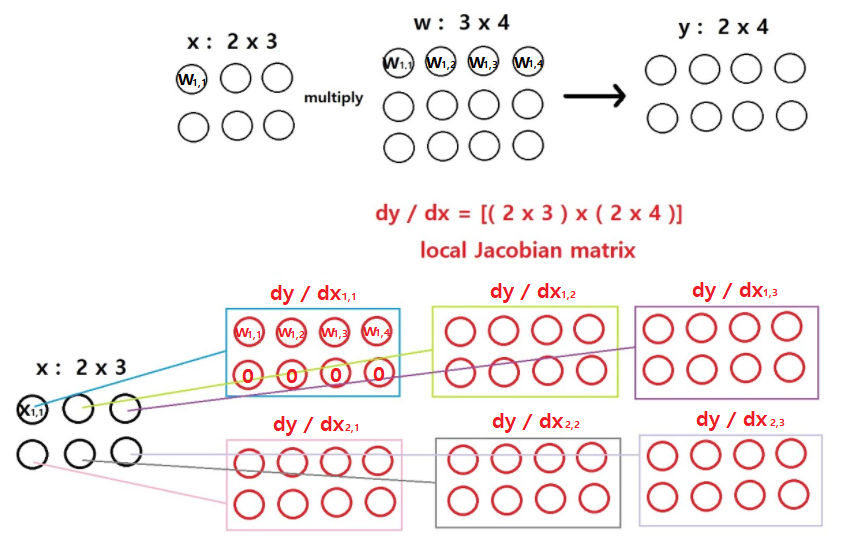

In [3]:
Image("14.png", width = 1000, height = 800)

In [ ]:
    #  위 예시에서 X의 (1,1) 위치에 있는 원소 (2)는 가중치행렬의 첫번째 행에 있는 원소들 (3, 2, 1, -1)에만 곱해진다.
    # 따라서 dy/dx1,1 행렬은 (편미분을 해보면) 첫번째 행렬이 가중치 행렬 w의 첫번째 행과 같고 나머지 원소는 모두 0인 행렬과 같다.
#          [3, 2, 1, -1]
#          [0, 0, 0, 0]

    # 우리가 구하고자 하는 dL/dx1,1 은 dy/dx1,1 과 dL/dy 를 내적한 것이므로 
    # (왜냐하면 체인룰에 따라 downstream gradient = local gradient * upstream gradient)
#    dy/dx1,1               dL/dy             
# [3, 2, 1, -1]       [2   3   -3   9]   이 두 행렬을 내적하면(element-wise 곱 한다음 그 모든 결과를 합계하면) 0이 된다.
# [0, 0, 0,  0]       [-8  1    4   6]   즉 dL/dx1,1 은 0이다. 
#                                              
    
    # 이런 식으로 모든 X의 원소에 대해 Y행렬의 모든 원소를 미분한 결과는
    # 결과적으로 dL/dy 에 가중치행렬을 전치한 행렬을 행렬곱한 것과 같아진다.
#                               w의 전치행렬   
#          dL/dy              [3,   2,   3]          dL/dx
#     [2   3   -3   9]        [2,   1,   2]      [0,    16,  -9]
#     [-8  1    4   6]        [1,    3,  1]      [-24,  9,  -30] 
#                             [-1,   2, -2]
    # 일반화하면 
    # dL/dx = upstream gradient dL/dy 곱하기 w의 전치행렬   >>> da1 = np.dot(dy, W2.T)    
    # dL/dw = x의 전치행렬 곱하기 upstream gradient dL/dy   >>> grads['W1'] = np.dot(x.T, dz1) / grads['W2'] = np.dot(z1.T,dy)

# xw = y,   
# x에 대한 y의 미분은 upstream gradient * W.T
# w에 대한 y의 미분은 x.T * upstream gradient    
    
# 위 두 연산은 단순한 upstream gradient와 local gradient를 곱하기 위한 행렬곱 연산이 아니라
# 매우 큰 고차원의 sparse 자코비언 행렬과 upstream gradient 행렬간의, 다시 말해 
# "Implicit" matrix vector multiplication 으로서의 upstream gradient와 local gradient의 곱셉으로 이해해야 한다. 